In [1]:
import numpy as np
from scipy.special import erf
import matplotlib.pyplot as plt
import pandas as pd
from numpy.linalg import matrix_rank, inv
from pprint import pprint
import sys
import os
current_notebook_dir = os.getcwd()
# Replace with the path to your IT_PI.py function
project_root_dir = os.path.join(current_notebook_dir, '..', '..')
it_pi_module_dir = project_root_dir
sys.path.append(it_pi_module_dir)
import IT_PI
plt.rcParams['font.family'] = 'Times New Roman'  # Set the font to Times New Roman
plt.rcParams['text.usetex'] = True  # Use LaTeX for all text rendering/', VIEW.as_view(), name=''),

In [2]:
## Load the dataset, handling invalid entries
try:
    data = np.genfromtxt(
        "MHD_Generator_Data_Uavg.csv",
        delimiter=',',
        skip_header=1,
        usecols=(1,2,3,4,5,6),
        dtype=float,
        invalid_raise=False  # Ignore rows with invalid data
    )
except ValueError as e:
    print("Error loading data:", e)
    data = None

# Check if the data loaded successfully
if data is not None:
    print(f"Data shape: {data.shape}")
else:
    print("Please check the CSV file for invalid entries.")
Xu = data[:, :5]
u  = data[:, 5]
mu    = (Xu[:,0])
rho   =  (Xu[:,1])
dp_dx =  (Xu[:,2])
eta   =  (Xu[:,3])
B     =  (Xu[:,4])
l     = np.ones(mu.shape)

X         = np.column_stack((l,mu,rho,eta,dp_dx,B))
Y         = u*rho*l/mu
print('input_shape: ', X.shape)
num_input = 1
variables   = ['l','\\mu', '\\rho','\\eta','dp_dx','B'];                       #Define variable name


Data shape: (483, 6)
input_shape:  (483, 6)


In [3]:
D_in             = np.matrix(' 1 -1 -3 3 -2 0; 0 -1 0 -3 -2  -2; 0 1 1 1 1 1 ;0 0 0 -2 0  -1')                           #Define D_in matrix 
print("Rank of D_in:", matrix_rank(D_in))
print("D_in matrix:\n", D_in)
num_rows          = np.shape(D_in)[0]
num_cols          = np.shape(D_in)[1]
num_basis        = D_in.shape[1] -matrix_rank(D_in)
basis_matrices   = IT_PI.calc_basis(D_in, num_basis)
print("Basis vectors:")
pprint(basis_matrices)

Rank of D_in: 4
D_in matrix:
 [[ 1 -1 -3  3 -2  0]
 [ 0 -1  0 -3 -2 -2]
 [ 0  1  1  1  1  1]
 [ 0  0  0 -2  0 -1]]
Basis vectors:
matrix([[-3. ,  2. , -1. ,  0. , -1. ,  0. ],
        [-1. ,  0.5,  0. ,  0.5,  0. , -1. ]])


In [4]:
# Run dimensionless learning
results = IT_PI.main(
    X,
    Y.reshape(-1, 1),
    basis_matrices,
    num_input=num_input,
    estimator="kraskov",
    estimator_params={"k": 8},
    seed=42
)


input_PI = results["input_PI"]
output_PI = results["output_PI"]

epsilon  = results["irreducible_error"]
uq       = results["uncertainty"]

------------------------------------------------------------
num of parameters: 2

Using estimator: 'kraskov' with hyperparameters: {'k': 8}

(150_w,300)-aCMA-ES (mu_w=78.0,w_1=3%) in dimension 2 (seed=42, Sun Sep  7 00:20:11 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1    300 -2.805426586106428e+00 1.0e+00 1.03e+00  8e-01  1e+00 0:00.5
    2    600 -2.917487035939377e+00 1.7e+00 1.30e+00  7e-01  1e+00 0:01.0
    3    900 -2.944153533381449e+00 1.9e+00 1.42e+00  5e-01  1e+00 0:01.5
   10   3000 -3.082080497222409e+00 6.5e+00 1.47e+00  2e-01  1e+00 0:04.9
   19   5700 -3.192887016419681e+00 3.8e+00 1.47e+00  3e-03  9e-03 0:09.1
   32   9600 -3.193596644430837e+00 4.8e+00 1.86e+00  3e-05  1e-04 0:14.3
   48  14400 -3.193619003616057e+00 5.6e+00 3.92e+00  4e-06  2e-05 0:20.4
termination on tolfunhist=1e-12
final/bestever f-value = -3.193619e+00 -3.193619e+00 after 14400/10470 evaluations
incumbent solution: [-0.7005876, 0.01254049]
std deviation: [1.

In [5]:
coef_pi_list     = results["input_coef"]
optimal_pi_lab   = IT_PI.create_labels(np.array(coef_pi_list).reshape(-1, len(variables)), variables)
for j, label in enumerate(optimal_pi_lab):
    print(f'Optimal_pi_lab[{j}] = {label}')

Optimal_pi_lab[0] = $\frac{l^{1.0} \cdot \rho^{0.34} \cdot dp_dx^{0.34}}{\mu^{0.67} \cdot B^{0.01}}$


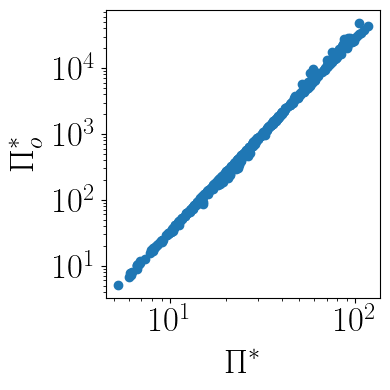

In [6]:
fig = plt.figure(figsize=(4, 4))
plt.scatter(input_PI,output_PI)
plt.xlabel(r" $\Pi^* $", fontsize=25, labelpad=8)  
plt.ylabel(r" $\Pi_{o}^*$", fontsize=25, labelpad=8)
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.tight_layout()
#fig.savefig("MHD_u.pdf", format="pdf", bbox_inches="tight",transparent = "True")


In [7]:
print(f'Irreducible error (epsilon) = {epsilon}')

Irreducible error (epsilon) = [0.5046977437667026]
